In [71]:
import pandas as pd
df=pd.read_csv('C:\\Users\\nEW u\\Desktop\\DataSEts\\Book1_KMeans.csv')

In [72]:
df.head(3)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000


In [73]:
x=df[['Age']]
y=df[['Income($)']]

In [74]:
x.head(3)

,Age
0,27
1,29
2,29


In [75]:
y.head(3)

,Income($)
0,70000
1,90000
2,61000


Text(0,0.5,'Income')

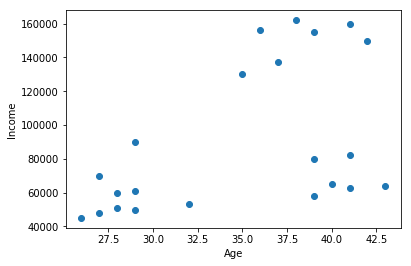

In [76]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('Income')

In [77]:
from sklearn.cluster import KMeans

In [78]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(x,y)
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1])

In [79]:
df['Cluster']=y_pred
df.head(3)

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,2


Text(0,0.5,'Income')

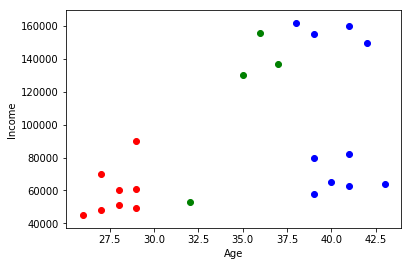

In [80]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

plt.scatter(df1.Age,df1[['Income($)']], color='green')
plt.scatter(df2.Age,df2[['Income($)']], color='blue')
plt.scatter(df3.Age,df3[['Income($)']], color='red')
plt.xlabel('Age')
plt.ylabel('Income')


In [96]:
#we are using MinMaxScaler because the differance between age and income in too high in data therefore by using
#MinMaxScaler() it will scale down in same scale

from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
m.fit(df[['Age']])
df['Age']=m.transform(df[['Age']])

In [97]:
df.head(3)


,Name,Age,Income($),cluster
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,2


In [98]:
m.fit(df[['Income($)']])
df['Income($)']=m.transform(df[['Income($)']])
df.head(3)

,Name,Age,Income($),cluster
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,2


In [99]:
km1=KMeans(n_clusters=3)
y_pred1=km1.fit_predict(df[['Age']],df[['Income($)']])
y_pred1

array([2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1])

In [100]:
km1.cluster_centers_

array([[0.52941176],
       [0.84117647],
       [0.09411765]])

In [101]:
df['cluster']=y_pred1

In [102]:
df.head(3)

,Name,Age,Income($),cluster
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1


In [103]:
df=df.drop(['Cluster'],axis='columns')

KeyError: "labels ['Cluster'] not contained in axis"

In [104]:
df.columns

Index(['Name', 'Age', 'Income($)', 'cluster'], dtype='object')

In [105]:
df.head(3)

,Name,Age,Income($),cluster
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1


Text(0,0.5,'Income')

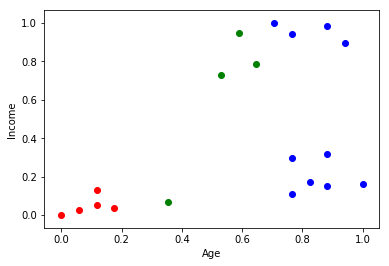

In [106]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1[['Income($)']], color='green')
plt.scatter(df2.Age,df2[['Income($)']], color='blue')
plt.scatter(df3.Age,df3[['Income($)']], color='red')
plt.xlabel('Age')
plt.ylabel('Income')


In [107]:
krang=range(1,10)
sse=[]

for i in krang:
    km2=KMeans(n_clusters=i)
    km2.fit_predict(df[['Age']],df[['Income($)']])
    sse.append(km2.inertia_)

Text(0,0.5,'sse')

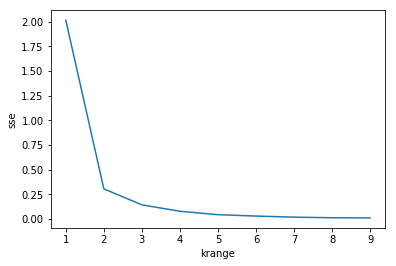

In [108]:
plt.plot(krang,sse)
plt.xlabel('krange')
plt.ylabel('sse')

### from the elbow graph it seems that the best fit k is 2 mns when k value is 2 

In [109]:
km_1=KMeans(n_clusters=2)
y_pred_1=km_1.fit_predict(df[['Age']],df[['Income($)']])
y_pred_1

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [110]:
km_1.cluster_centers_

array([[0.1372549 ],
       [0.78280543]])

In [111]:
df['cluster']=y_pred_1

In [112]:
df.head(3)

,Name,Age,Income($),cluster
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1


Text(0,0.5,'Income')

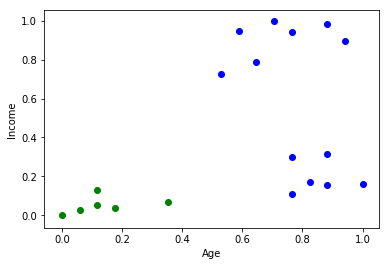

In [113]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1[['Income($)']], color='green')
plt.scatter(df2.Age,df2[['Income($)']], color='blue')
plt.scatter(df3.Age,df3[['Income($)']], color='red')
plt.xlabel('Age')
plt.ylabel('Income')
